# 데이터 불러오기

In [47]:
import pandas as pd
import os

pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', None)

PATH = './data/서울시 상권분석서비스(오탈자 수정)/'

file_list= os.listdir(PATH)
csv_list = list()

for file in file_list:
    if file.split(".")[-1] == 'csv':
        csv_list.append(file)
data = ['rent','small_rent','big_rent','living_popul','indicator','resident_popul', 'income','apartment', 'area', 'store', 'working_popul', 'facilitie', 'estimated_sales']

for name, file in zip(data, csv_list):
    if name == 'rent':
        globals()[name] = pd.read_csv(PATH + file, names = ['기준년코드', '기준분기코드', '행정동코드', '행정동코드명', '임대시세층구분코드', '임대시세층구분명', '보증금평균','월임대료평균','환산임대료평균','임대건수'],encoding = "ansi")
    else:
        globals()[name] = pd.read_csv(PATH + file, encoding = "ansi")

store = store.drop("Unnamed: 0", axis = 1)
estimated_sales = estimated_sales.drop("Unnamed: 0", axis = 1)

# 데이터 전처리

## 시점 통일

In [48]:
years = [20223, 20224, 20231, 20232]

living_popul = living_popul[living_popul['기준_년분기_코드'].isin(years)]
resident_popul = resident_popul[resident_popul['기준_년분기_코드'].isin(years)]
store = store[store['기준_년분기_코드'].isin(years)]
working_popul = working_popul[working_popul['기준_년분기_코드'].isin(years)]
facilitie = facilitie[facilitie['기준_년분기_코드'].isin(years)]
estimated_sales = estimated_sales[estimated_sales['기준_년분기_코드'].isin(years)]

## 길단위인구 전처리

### 파생변수 생성
1.시간대_21_06_유동인구_수
  - 21_00시 유동인구의 특징과 00_06시 유동인구의 특징이 비슷하다고 생각하여 합침

2.주중_유동인구_수
  - 월~금 유동인구 수의 합

3.주말_유동인구_수
  - 토,일 유동인구 수의 합

4.30_40, 50_60대 유동인구 수 합

In [108]:
living_popul['시간대_21_06_유동인구_수'] = living_popul['시간대_00_06_유동인구_수'] + living_popul['시간대_21_24_유동인구_수']
living_popul['주중_유동인구_수'] = living_popul['월요일_유동인구_수'] + living_popul['화요일_유동인구_수'] + living_popul['수요일_유동인구_수'] + living_popul['목요일_유동인구_수'] + living_popul['금요일_유동인구_수']
living_popul['주말_유동인구_수'] = living_popul['토요일_유동인구_수'] + living_popul['일요일_유동인구_수']
living_popul['연령대_30_40_유동인구_수'] = living_popul['연령대_30_유동인구_수'] + living_popul['연령대_40_유동인구_수']
living_popul['연령대_50_60_유동인구_수'] = living_popul['연령대_50_유동인구_수'] + living_popul['연령대_60_이상_유동인구_수']

### 불필요한 feature 제거
- 상권_구분_코드
- 상권_코드
- 월~일 유동인구 수
- 21~06시 유동인구수
- 30~60대 연령

In [109]:
living_popul = living_popul.drop(['상권_구분_코드','상권_코드','월요일_유동인구_수', '화요일_유동인구_수', '수요일_유동인구_수', '목요일_유동인구_수', '금요일_유동인구_수', '토요일_유동인구_수', '일요일_유동인구_수', '시간대_00_06_유동인구_수', '시간대_21_24_유동인구_수','연령대_30_유동인구_수','연령대_40_유동인구_수','연령대_50_유동인구_수','연령대_60_이상_유동인구_수'], axis = 1)

### 결측치 확인 및 제거
- 결측치 없음

In [76]:
living_popul.isnull().sum()

기준_년분기_코드           0
상권_구분_코드_명          0
상권_코드_명             0
총_유동인구_수            0
남성_유동인구_수           0
여성_유동인구_수           0
연령대_10_유동인구_수       0
연령대_20_유동인구_수       0
시간대_06_11_유동인구_수    0
시간대_11_14_유동인구_수    0
시간대_14_17_유동인구_수    0
시간대_17_21_유동인구_수    0
시간대_21_06_유동인구_수    0
주중_유동인구_수           0
주말_유동인구_수           0
연령대_30_40_유동인구_수    0
연령대_50_60_유동인구_수    0
dtype: int64

### 이상치 확인 및 제거
- 하위 5% 제거

In [77]:
living_popul.describe()

,기준_년분기_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수
count,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000,6597.000
mean,20227.499,831723.936,396454.429,435269.521,106249.107,148852.466,169196.692,107398.432,108468.099,144295.668,302365.121,600110.514,231613.502,281556.790,295065.647
std,4.032,900980.836,437696.274,466905.782,113447.145,216584.734,179874.328,134146.790,137040.744,167412.286,321245.522,660890.833,246084.966,332193.428,308808.842
min,20223.000,12.000,12.000,0.000,0.000,0.000,4.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.000,221703.000,106884.000,113949.000,25620.000,32184.000,45807.000,28462.000,28587.000,38158.000,75590.000,159214.000,60098.000,74298.000,79315.000
50%,20224.000,568553.000,269829.000,297045.000,71540.000,82940.000,117002.000,72028.000,72359.000,96289.000,205750.000,406266.000,159173.000,185168.000,206051.000
75%,20231.000,1138476.000,537610.000,593960.000,147393.000,184525.000,234575.000,140269.000,140608.000,194982.000,417273.000,828500.000,314287.000,370667.000,412023.000
max,20232.000,8657826.000,4693188.000,4032096.000,829062.000,3487417.000,1678321.000,1853219.000,1861965.000,1793125.000,2942275.000,6833618.000,2124591.000,3506912.000,3565244.000


In [78]:
living_popul['총_유동인구_수'].quantile(0.05)

41133.6

In [79]:
living_popul = living_popul[living_popul['총_유동인구_수']>living_popul['총_유동인구_수'].quantile(0.05)]

In [80]:
living_popul.describe()

,기준_년분기_코드,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수
count,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000,6267.000
mean,20227.500,874190.123,416689.079,457501.062,111666.253,156505.756,177830.183,112872.030,113996.394,151665.367,317826.224,630746.050,243444.156,295937.314,310080.871
std,4.031,904684.998,439863.160,468613.238,113846.783,219563.353,180466.520,135439.711,138412.474,168572.726,322262.267,664086.577,246876.670,334706.730,309638.835
min,20223.000,41149.000,13408.000,18623.000,1160.000,558.000,7115.000,3788.000,3588.000,4534.000,5504.000,28600.000,8959.000,8992.000,8232.000
25%,20223.500,265877.000,127399.500,139315.000,30586.000,38001.000,54670.000,33769.500,34664.000,45727.000,90057.000,190536.000,74225.500,88280.000,96761.000
50%,20231.000,606112.000,290723.000,316217.000,76733.000,89453.000,124744.000,76888.000,77725.000,103257.000,222263.000,438923.000,168084.000,198490.000,221653.000
75%,20231.000,1201003.000,563484.500,625879.000,152238.500,193015.000,242915.500,146333.000,146576.000,202056.500,436076.500,862701.000,331312.500,384735.500,424882.000
max,20232.000,8657826.000,4693188.000,4032096.000,829062.000,3487417.000,1678321.000,1853219.000,1861965.000,1793125.000,2942275.000,6833618.000,2124591.000,3506912.000,3565244.000


### 중복행 확인 및 제거
- 중복행 없음

In [246]:
living_popul[living_popul.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수


### 분기데이터 1년치 데이터로 변환
- 유동인구 -> 4개 분기의 평균

In [247]:
living_popul_year = living_popul.groupby(['상권_구분_코드_명','상권_코드_명'],as_index=False).mean()
living_popul_year = living_popul_year.drop('기준_년분기_코드', axis = 1)

## 상주인구 전처리

### 불필요한 feature 제거
- 상권_구분_코드
- 상권_코드
- 총 상주인구 수
- 남성 상주인구 수
- 여성 상주인구 수
- 연령대 10 ~ 60 이상상주인구 수
- 총 가구 수, 아파트 가구 수, 비아파트 가구수

In [21]:
resident_popul[resident_popul['상권_코드_명']=='개포지하차도 북측']

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
16007,20223,A,골목상권,3110993,개포지하차도 북측,234,121,113,27,36,39,33,42,57,14,24,25,14,21,23,13,12,14,19,21,34,119,0,119
17640,20224,A,골목상권,3110993,개포지하차도 북측,236,107,129,28,25,45,44,31,63,17,15,19,14,13,29,11,10,26,30,18,34,119,0,119
19249,20231,A,골목상권,3110993,개포지하차도 북측,236,107,129,28,25,45,44,31,63,17,15,19,14,13,29,11,10,26,30,18,34,110,0,110
20878,20232,A,골목상권,3110993,개포지하차도 북측,236,107,129,28,25,45,44,31,63,17,15,19,14,13,29,11,10,26,30,18,34,119,0,119


In [248]:
resident_popul = resident_popul[['기준_년분기_코드','상권_구분_코드_명','상권_코드_명','총_상주인구_수','남성_상주인구_수','여성_상주인구_수','연령대_10_상주인구_수','연령대_20_상주인구_수','연령대_30_상주인구_수','연령대_40_상주인구_수','연령대_50_상주인구_수','연령대_60_이상_상주인구_수']]

### 파생변수 생성

In [249]:
resident_popul['상권_구분_코드_명'].unique()

array(['골목상권', '발달상권', '전통시장', '관광특구'], dtype=object)

In [250]:
resident_popul['연령대_30_40_상주인구_수'] = resident_popul['연령대_30_상주인구_수']+resident_popul['연령대_40_상주인구_수']
resident_popul['연령대_50_60_상주인구_수'] = resident_popul['연령대_50_상주인구_수']+resident_popul['연령대_60_이상_상주인구_수']

In [251]:
resident_popul.drop(['연령대_30_상주인구_수','연령대_40_상주인구_수','연령대_50_상주인구_수','연령대_60_이상_상주인구_수'],axis=1,inplace=True)

### 결측치 확인 및 제거
- 결측치 없음

In [252]:
resident_popul.isnull().sum()

기준_년분기_코드           0
상권_구분_코드_명          0
상권_코드_명             0
총_상주인구_수            0
남성_상주인구_수           0
여성_상주인구_수           0
연령대_10_상주인구_수       0
연령대_20_상주인구_수       0
연령대_30_40_상주인구_수    0
연령대_50_60_상주인구_수    0
dtype: int64

### 이상치 확인 및 제거
- 이상치가 없다고 판단됨

In [253]:
resident_popul.describe()

,기준_년분기_코드,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수
count,6512.000,6512.000,6512.000,6512.000,6512.000,6512.000,6512.000,6512.000
mean,20227.495,2361.003,1166.658,1194.345,230.155,300.171,789.651,1041.026
std,4.032,2349.098,1159.233,1195.283,262.098,340.145,834.359,1031.672
min,20223.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.000,656.750,328.000,329.750,52.000,70.000,207.000,281.000
50%,20224.000,1621.000,811.500,817.000,147.000,195.000,528.000,721.000
75%,20231.000,3306.250,1639.000,1677.000,318.000,413.250,1083.000,1466.000
max,20232.000,21341.000,10459.000,10882.000,3078.000,4457.000,7626.000,8342.000


In [130]:
resident_popul[resident_popul['총_상주인구_수']>15000]

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_상주인구_수,연령대_40_상주인구_수,연령대_50_상주인구_수,연령대_60_이상_상주인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수
15673,20223,A,골목상권,3110659,화곡역 4번,18476,8997,9479,2694,2923,3202,3047,2753,3857,1350,1380,1745,1543,1286,1693,1344,1543,1457,1504,1467,2164,8411,0,8411
17307,20224,A,골목상권,3110659,화곡역 4번,21341,10459,10882,3078,2295,3346,4280,3161,5181,1586,1133,1668,2235,1577,2260,1492,1162,1678,2045,1584,2921,8411,0,8411
18919,20231,A,골목상권,3110659,화곡역 4번,21341,10459,10882,3078,2295,3346,4280,3161,5181,1586,1133,1668,2235,1577,2260,1492,1162,1678,2045,1584,2921,8443,0,8443
20544,20232,A,골목상권,3110659,화곡역 4번,21341,10459,10882,3078,2295,3346,4280,3161,5181,1586,1133,1668,2235,1577,2260,1492,1162,1678,2045,1584,2921,8411,0,8411


In [302]:
outlier_list = list(resident_popul[resident_popul['총_상주인구_수']<10].상권_코드_명.unique())
for i in outlier_list:
    print(resident_popul[resident_popul['상권_코드_명']==i])

       기준_년분기_코드 상권_구분_코드_명    상권_코드_명  총_상주인구_수  남성_상주인구_수  여성_상주인구_수  \
15122      20223       골목상권  성동구립금호도서관         3          1          2   
16756      20224       골목상권  성동구립금호도서관         3          1          2   
18369      20231       골목상권  성동구립금호도서관         3          1          2   
19994      20232       골목상권  성동구립금호도서관         3          1          2   

       연령대_10_상주인구_수  연령대_20_상주인구_수  연령대_30_40_상주인구_수  연령대_50_60_상주인구_수  
15122              0              0                 1                 2  
16756              0              0                 1                 2  
18369              0              0                 1                 2  
19994              0              0                 1                 2  
       기준_년분기_코드 상권_구분_코드_명 상권_코드_명  총_상주인구_수  남성_상주인구_수  여성_상주인구_수  \
15807      20223       골목상권  대림썬프라자         1          1          0   
17441      20224       골목상권  대림썬프라자         9          5          4   
19052      20231       골목상권  대림썬프라자         9 

### 중복행 확인 및 제거
- 중복행 없음

In [254]:
resident_popul[resident_popul.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수


### 분기데이터 1년치 데이터로 변환
- 마지막 분기인 2023년 2분기의 상주인구만 추출

In [255]:
resident_popul_year = resident_popul[resident_popul['기준_년분기_코드'] == 20232]
resident_popul_year = resident_popul_year.drop(['기준_년분기_코드'],axis=1)

## 점포 전처리

### 불필요한 feature 제거
- 상권_구분_코드
- 상권_코드
- 서비스_업종_코드

In [256]:
store.drop(['상권_구분_코드','상권_코드','서비스_업종_코드'],axis=1,inplace=True)

### 중복행 확인 및 제거
- 중복행 없음

In [257]:
store[store.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수


### 결측치 확인 및 제거
- 결측치 없음

In [258]:
store.isnull().sum()

기준_년분기_코드      0
상권_구분_코드_명     0
상권_코드_명        0
서비스_업종_코드_명    0
점포_수           0
유사_업종_점포_수     0
개업_율           0
개업_점포_수        0
폐업_률           0
폐업_점포_수        0
프랜차이즈_점포_수     0
dtype: int64

### 이상치 확인 및 제거
- 점포수 -> 8500개? 이상치 인듯?

In [259]:
store.describe()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
count,304774.000,304774.000,304774.000,304774.000,304774.000,304774.000,304774.000,304774.000
mean,20227.497,6.056,6.506,2.292,0.138,2.479,0.179,0.450
std,4.031,42.503,42.878,10.900,0.615,11.805,1.158,2.232
min,20223.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000
50%,20224.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000
75%,20231.000,4.000,5.000,0.000,0.000,0.000,0.000,0.000
max,20232.000,9002.000,9018.000,200.000,29.000,400.000,288.000,127.000


In [260]:
store[store['점포_수']>1000]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
1056166,20223,발달상권,구로역,조명용품,2190,2191,0,3,1,11,1
1059879,20223,발달상권,가락시장,청과상,1655,1655,0,5,1,9,0
1070476,20223,발달상권,가산디지털단지,전자상거래업,1207,1211,0,2,3,41,4
1077493,20223,발달상권,용산전자상가(용산역),컴퓨터및주변장치판매,1826,1828,0,8,2,32,2
1078704,20223,관광특구,동대문패션타운 관광특구,유아의류,1513,1516,0,0,4,53,3
1088295,20223,발달상권,신당역,일반의류,1749,1754,0,1,4,62,5
1098955,20223,관광특구,동대문패션타운 관광특구,일반의류,9002,9018,0,19,3,288,16
1101418,20223,전통시장,"평화시장(통일상가, 동화상가)",일반의류,1278,1282,1,11,3,42,4
1116930,20223,관광특구,명동 남대문 북창동 다동 무교동 관광특구,일반의류,2200,2202,1,20,2,47,2
1118140,20223,전통시장,"평화시장(남평화시장, 제일평화시장, 신평화패션타운)",일반의류,1908,1909,0,4,4,68,1


### 분기데이터 1년치 데이터로 변환
- 마지막 분기인 2023년 2분기의 데이터만 추출

In [261]:
store_year = store[store['기준_년분기_코드'] == 20232]
store_year = store_year.drop(columns = ['기준_년분기_코드'])

## 직장인구 전처리

### 필요한 컬럼만 추출
- 기준_년분기_코드
- 상권_구분_코드_명
- 상권_코드_명
- 총_직장_인구_수

In [262]:
working_popul = working_popul[['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '총_직장_인구_수']]


### 결측치 확인 및 제거
- 결측치 없음

In [263]:
working_popul.isnull().sum()

기준_년분기_코드     0
상권_구분_코드_명    0
상권_코드_명       0
총_직장_인구_수     0
dtype: int64

### 이상치 확인 및 제거
- 이상치 없음

In [264]:
working_popul.describe()

,기준_년분기_코드,총_직장_인구_수
count,6492.000,6492.000
mean,20227.500,1771.425
std,4.031,6246.210
min,20223.000,1.000
25%,20223.750,107.000
50%,20227.500,317.000
75%,20231.250,892.000
max,20232.000,104830.000


In [265]:
working_popul[working_popul['총_직장_인구_수']>60000]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,총_직장_인구_수
7062,20223,발달상권,포스코사거리,61667
7711,20223,관광특구,명동 남대문 북창동 다동 무교동 관광특구,104830
8043,20223,발달상권,가산디지털단지,81127
8083,20223,발달상권,강남역,72613
8259,20223,발달상권,여의도역(여의도),69255
8685,20224,발달상권,포스코사거리,61667
9334,20224,관광특구,명동 남대문 북창동 다동 무교동 관광특구,104830
9665,20224,발달상권,가산디지털단지,81127
9706,20224,발달상권,강남역,72613
9882,20224,발달상권,여의도역(여의도),69255


### 중복행 확인 및 제거
- 중복행 없음

In [266]:
working_popul[working_popul.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,총_직장_인구_수


### 분기데이터 1년치 데이터로 변환
- 마지막 분기인 2023년 2분기의 데이터만 추출

In [267]:
working_popul_year = working_popul[working_popul['기준_년분기_코드'] == 20232]
working_popul_year = working_popul_year.drop(['기준_년분기_코드'],axis=1)

## 집객시설 전처리

### 불필요한 feature 제거
- 상권_구분_코드
- 상권_코드
- 집객시설_수

In [268]:
facilitie.drop(['상권_구분_코드','상권_코드','집객시설_수','철도_역_수'],axis=1,inplace=True)

### 파생변수 생성

In [269]:
facilitie['초중고_수'] = facilitie['초등학교_수']+facilitie['중학교_수']+facilitie['고등학교_수']
facilitie.drop(['초등학교_수','중학교_수','고등학교_수'],axis=1,inplace=True)

### 결측치 확인 및 제거
- 결측치 -> 0으로 처리

In [270]:
facilitie.isnull().sum()

기준_년분기_코드        0
상권_구분_코드_명       0
상권_코드_명          0
관공서_수         3792
은행_수          4364
종합병원_수        6220
일반_병원_수       5784
약국_수          2276
유치원_수         5708
대학교_수         5976
백화점_수         6268
슈퍼마켓_수        5892
극장_수          5976
숙박_시설_수       5732
공항_수          6308
버스_터미널_수      6304
지하철_역_수       5532
버스_정거장_수      1232
초중고_수         6308
dtype: int64

In [271]:
facilitie.shape

(6312, 19)

In [272]:
facilitie = facilitie.fillna(0)
facilitie.isnull().sum()

기준_년분기_코드     0
상권_구분_코드_명    0
상권_코드_명       0
관공서_수         0
은행_수          0
종합병원_수        0
일반_병원_수       0
약국_수          0
유치원_수         0
대학교_수         0
백화점_수         0
슈퍼마켓_수        0
극장_수          0
숙박_시설_수       0
공항_수          0
버스_터미널_수      0
지하철_역_수       0
버스_정거장_수      0
초중고_수         0
dtype: int64

### 이상치 확인 및 제거
- 은행 52개 버스정거장수 85 집객 시설 수 594개 이상한데

In [273]:
facilitie.describe()

,기준_년분기_코드,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수
count,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000,6312.000
mean,20227.500,0.695,1.015,0.015,0.107,2.359,0.112,0.087,0.008,0.102,0.072,0.213,0.003,0.001,0.176,3.896,0.003
std,4.031,1.172,3.010,0.127,0.396,4.034,0.385,0.466,0.094,0.495,0.352,1.027,0.101,0.036,0.535,4.959,0.126
min,20223.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20223.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
50%,20227.500,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000
75%,20231.250,1.000,1.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000
max,20232.000,14.000,57.000,2.000,4.000,52.000,6.000,7.000,2.000,8.000,5.000,18.000,4.000,1.000,5.000,85.000,5.000


In [274]:
facilitie[facilitie['약국_수']==52]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수
2544,20232,발달상권,강남역,7.000,24.000,0.000,0.000,52.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,2.000,36.000,0.000
2545,20231,발달상권,강남역,7.000,24.000,0.000,0.000,52.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,2.000,36.000,0.000
14631,20224,발달상권,강남역,7.000,24.000,0.000,0.000,52.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,2.000,36.000,0.000
14632,20223,발달상권,강남역,7.000,24.000,0.000,0.000,52.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,2.000,36.000,0.000


In [275]:
facilitie[facilitie['버스_정거장_수']>80]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수
2386,20232,발달상권,가산디지털단지,7.000,25.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,1.000,3.000,0.000,0.000,2.000,85.000,0.000
2387,20231,발달상권,가산디지털단지,7.000,25.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,1.000,3.000,0.000,0.000,2.000,85.000,0.000
13920,20224,발달상권,가산디지털단지,7.000,25.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,1.000,3.000,0.000,0.000,2.000,85.000,0.000
13921,20223,발달상권,가산디지털단지,7.000,25.000,0.000,0.000,16.000,0.000,0.000,0.000,0.000,1.000,3.000,0.000,0.000,2.000,85.000,0.000


In [276]:
area[area['상권_코드_명']=='가산디지털단지']

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
1235,D,발달상권,3120131,가산디지털단지,189641,441969,11545,금천구,11545510,가산동,1713620


In [277]:
area[area['상권_코드_명']=='명동 남대문 북창동 다동 무교동 관광특구']

,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적
1645,U,관광특구,3001492,명동 남대문 북창동 다동 무교동 관광특구,198397,451614,11140,중구,11140520,소공동,983618


In [278]:
area.describe()

,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,행정동_코드,영역_면적
count,1650.000,1650.000,1650.000,1650.000,1650.000,1650.000
mean,3115221.905,198981.845,449875.452,11426.218,11426858.585,99927.952
std,10321.659,7280.721,5590.503,190.534,190548.801,118818.943
min,3001491.000,182509.000,437249.000,11110.000,11110515.000,1854.000
25%,3110407.250,192815.250,445178.500,11260.000,11260575.000,35330.000
50%,3110819.500,200096.000,449849.500,11440.000,11440590.000,71927.500
75%,3120141.750,204366.250,453563.500,11590.000,11590560.000,128147.250
max,3130327.000,215352.000,465573.000,11740.000,11740700.000,2462734.000


### 중복행 확인 및 제거
- 중복행 없음


In [279]:
facilitie[facilitie.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수


### 분기데이터 1년치 데이터로 변환
- 마지막 분기인 2023년 2분기의 데이터만 추출

In [280]:
facilitie_year = facilitie[facilitie['기준_년분기_코드'] == 20232]
facilitie_year = facilitie_year.drop(['기준_년분기_코드'],axis=1)

## 추정매출 전처리

### 파생변수 생성
1.시간대_21_06_매출_건수, 시간대_21_06_매출_금액
- 21_00시 유동인구의 특징과 00_06시 유동인구의 특징이 비슷하다고 판단함

In [49]:
estimated_sales['시간대_21~06_매출_금액'] = estimated_sales['시간대_00~06_매출_금액'] + estimated_sales['시간대_21~24_매출_금액']
estimated_sales['시간대_21~06_매출_건수'] = estimated_sales['시간대_건수~06_매출_건수'] + estimated_sales['시간대_건수~24_매출_건수']
estimated_sales['연령대_30_40_매출_금액'] = estimated_sales['연령대_30_매출_금액'] + estimated_sales['연령대_40_매출_금액']
estimated_sales['연령대_50_60_매출_금액'] = estimated_sales['연령대_50_매출_금액'] + estimated_sales['연령대_60_이상_매출_금액']
estimated_sales['연령대_30_40_매출_건수'] = estimated_sales['연령대_30_매출_건수'] + estimated_sales['연령대_40_매출_건수']
estimated_sales['연령대_50_60_매출_건수'] = estimated_sales['연령대_50_매출_건수'] + estimated_sales['연령대_60_이상_매출_건수']

### 불필요한 feature제거
- 상권_구분_코드- 
상권_코
- 서비스_업종_코드
- 21~06 매출금액, 매출건수
- 월~일 매출금액, 매출건수드

In [50]:
estimated_sales = estimated_sales.drop(columns = ['상권_구분_코드', '상권_코드', '서비스_업종_코드'],
                                       axis = 1)
estimated_sales = estimated_sales.drop(columns = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액',
                                                  '월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수'],
                                       axis = 1)
estimated_sales = estimated_sales.drop(columns = ['시간대_00~06_매출_금액', '시간대_21~24_매출_금액', '시간대_건수~06_매출_건수', '시간대_건수~24_매출_건수',
                                                 '연령대_30_매출_금액','연령대_40_매출_금액','연령대_50_매출_금액','연령대_60_이상_매출_금액',
                                                 '연령대_30_매출_건수','연령대_40_매출_건수','연령대_50_매출_건수','연령대_60_이상_매출_건수'],
                                       axis = 1)

### 결측치 확인 및 제거
- 결측치 어떻게 처리하지

In [51]:
estimated_sales.isnull().sum()

기준_년분기_코드          0
상권_구분_코드_명         0
상권_코드_명            0
서비스_업종_코드_명        0
당월_매출_금액           0
당월_매출_건수           0
주중_매출_금액           0
주말_매출_금액           0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
주중_매출_건수           0
주말_매출_건수           0
시간대_건수~11_매출_건수    0
시간대_건수~14_매출_건수    0
시간대_건수~17_매출_건수    0
시간대_건수~21_매출_건수    0
남성_매출_건수           0
여성_매출_건수           0
연령대_10_매출_건수       0
연령대_20_매출_건수       0
시간대_21~06_매출_금액    0
시간대_21~06_매출_건수    0
연령대_30_40_매출_금액    0
연령대_50_60_매출_금액    0
연령대_30_40_매출_건수    0
연령대_50_60_매출_건수    0
dtype: int64

### 이상치 확인 및 제거
- 당원매출금액 천억 이상치인듯

In [52]:
estimated_sales.describe()

,기준_년분기_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수
count,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000,84143.000
mean,20227.506,1116599271.468,39184.849,842969184.583,273630043.386,116413408.602,286186909.051,280424841.016,306646276.190,506115717.968,483588097.551,5734552.208,135382675.504,29499.636,9685.213,5416.564,10204.191,8307.715,10443.374,19337.490,18168.507,577.372,7898.857,126927760.944,4813.006,431464849.292,417119530.685,16555.601,12474.165
std,4.031,9371981938.469,168454.273,6458423614.170,3509552781.251,1172352096.256,2477461950.285,3124214644.465,2771104568.472,4449083121.756,3616311150.276,31894990.608,909570386.425,117929.298,57711.259,29263.631,45978.917,44186.686,47735.342,83502.247,83244.346,3617.461,42063.066,1000325381.326,23992.316,3469029992.731,3773146796.252,73433.475,61385.401
min,20223.000,12.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20224.000,48560077.000,868.000,36205605.500,7456979.500,145574.500,5491691.000,7869005.500,11816467.500,19597595.500,18111528.500,0.000,1369387.500,654.000,153.000,7.000,109.000,173.000,226.000,390.000,342.000,0.000,43.000,0.000,0.000,15857293.000,15467433.000,324.000,297.000
50%,20231.000,188164542.000,4646.000,140846234.000,38302621.000,6268042.000,34963031.000,36234148.000,50583967.000,84295031.000,75951653.000,166368.000,12428462.000,3446.000,1036.000,169.000,985.000,983.000,1304.000,2286.000,1968.000,12.000,446.000,4061538.000,77.000,69746034.000,63905807.000,1783.000,1642.000
75%,20232.000,686193977.000,25492.500,520555159.000,150576100.000,48504462.500,153603359.000,143040793.500,186412033.000,314344883.500,290361639.500,2273891.500,64077848.500,19055.500,5839.500,1996.000,6405.500,5206.500,6992.500,12096.000,11579.000,174.000,3306.000,51155789.000,1497.000,260456794.500,241524127.500,9897.000,8588.000
max,20232.000,995677000000.000,12090273.000,669799000000.000,485357000000.000,107916000000.000,242249000000.000,326543000000.000,386343000000.000,537243000000.000,304162000000.000,1549259735.000,90669553834.000,5827863.000,6262410.000,1474148.000,2611826.000,3245770.000,4287338.000,6708993.000,4615812.000,329040.000,3087414.000,126314287024.000,1514884.000,354347000000.000,411544000000.000,4519958.000,5329793.000


In [53]:
estimated_sales = estimated_sales[estimated_sales['당월_매출_금액'] > estimated_sales['당월_매출_금액'].quantile(0.05)]

In [54]:
# estimated_sales = estimated_sales[estimated_sales['주중_매출_금액']!=0]

In [55]:
estimated_sales.describe()

,기준_년분기_코드,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수
count,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000,79910.000
mean,20227.510,1175597456.720,41253.207,887507177.283,288090233.634,122569286.882,301312835.411,295232837.487,322843537.799,532861780.719,509125119.745,6037557.922,142539050.817,31056.751,10196.456,5702.835,10742.826,8745.661,10994.499,20358.247,19127.432,607.857,8316.076,133638879.468,5067.385,454263590.356,439144377.094,17429.801,13131.945
std,4.031,9613410702.631,172612.275,6624300996.856,3600731534.712,1202689652.525,2541339569.658,3205216118.990,2842636857.567,4563845031.660,3709111089.954,32700972.411,932805213.307,120813.202,59176.211,30001.578,47119.856,45299.864,48921.690,85564.427,85313.673,3709.545,43122.670,1026042293.098,24593.442,3558274837.804,3870548770.285,75252.493,62921.988
min,20223.000,6000485.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,20224.000,61553062.500,1147.250,45415658.000,10151943.000,405638.000,7810570.500,10408617.250,15270774.750,25492462.500,23402822.250,0.000,2154083.250,857.000,219.000,12.000,159.000,233.000,305.000,530.000,455.000,0.000,65.000,0.000,0.000,20784705.750,19870137.750,431.000,403.000
50%,20231.000,213986783.500,5427.000,160375563.000,43749917.000,7853794.000,40723608.000,41477139.000,57562207.000,95942778.500,86474224.000,241255.500,14624255.000,4041.000,1219.000,214.000,1196.000,1151.500,1526.000,2687.000,2304.000,16.000,546.500,5503772.000,106.000,79304099.500,72552049.500,2093.000,1906.000
75%,20232.000,736243785.500,28070.000,558895877.000,161469121.750,53706674.250,165808976.250,153783032.250,200397808.000,339831489.000,312438057.500,2532179.500,69973364.750,21071.750,6419.000,2274.000,7044.750,5731.750,7716.750,13379.750,12634.250,197.750,3694.000,57321897.750,1720.000,279537104.000,261060704.750,10992.750,9475.750
max,20232.000,995677000000.000,12090273.000,669799000000.000,485357000000.000,107916000000.000,242249000000.000,326543000000.000,386343000000.000,537243000000.000,304162000000.000,1549259735.000,90669553834.000,5827863.000,6262410.000,1474148.000,2611826.000,3245770.000,4287338.000,6708993.000,4615812.000,329040.000,3087414.000,126314287024.000,1514884.000,354347000000.000,411544000000.000,4519958.000,5329793.000


In [56]:
estimated_sales['당월_개인_매출_금액'] = estimated_sales['남성_매출_금액'] + estimated_sales['여성_매출_금액']
estimated_sales['당월_법인_매출_금액'] =  estimated_sales['당월_매출_금액'] - estimated_sales['당월_개인_매출_금액']

In [57]:
estimated_sales[estimated_sales['당월_법인_매출_금액'] < 0]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,당월_개인_매출_금액,당월_법인_매출_금액
123702,20223,골목상권,수락산디자인거리,미용실,128155270.000,3576,77245305.000,50909965.000,4474130.000,39437551.000,41771165.000,42472424.000,46376063.000,81779208.000,2583063,19338039,2202,1374,239,1098,1175,1064,1852,1723,70,595,0.000,0,62900581.000,43333588.000,1803,1107,128155271.000,-1.000
124584,20223,골목상권,남가좌동현대아파트,예술학원,82300920.000,562,74595784.000,7705136.000,2417887.000,15628905.000,38749921.000,24317797.000,24242787.000,58058134.000,0,739884,502,60,27,113,261,154,201,362,0,5,1186410.000,7,79672129.000,1888907.000,541,16,82300921.000,-1.000
126952,20223,골목상권,독산2동주민센터,예술학원,16296020.000,142,16296020.000,0.000,0.000,2562074.000,9816950.000,1662610.000,5337505.000,10958516.000,0,0,142,0,0,22,78,28,59,82,0,0,2254386.000,14,15649030.000,646991.000,137,4,16296021.000,-1.000
131445,20223,발달상권,금호역,일반의류,110771775.000,1445,82737977.000,28033798.000,1360644.000,33070520.000,22738223.000,44340462.000,19589891.000,91181885.000,0,4969090,1113,332,41,428,336,631,202,1244,0,33,9261926.000,9,32852399.000,72950287.000,421,992,110771776.000,-1.000
134214,20223,발달상권,영중로,스포츠클럽,11692459.000,13,11692459.000,0.000,0.000,0.000,0.000,945714.000,5158438.000,6534022.000,0,5588308,13,0,0,0,0,4,4,8,0,4,10746745.000,9,6104152.000,0.000,8,0,11692460.000,-1.000
134285,20223,발달상권,보라매역,스포츠 강습,68614852.000,249,49224484.000,19390368.000,3847017.000,14516035.000,14529714.000,8791609.000,37723373.000,30891480.000,0,1313616,184,65,9,50,72,44,118,132,0,5,26930477.000,74,57150765.000,10150472.000,206,39,68614853.000,-1.000
140165,20223,전통시장,신원시장,네일숍,31342017.000,62,29170078.000,2171939.000,0.000,682610.000,6784651.000,23548290.000,12179733.000,19162285.000,296787,4281193,40,22,0,10,19,28,8,55,5,20,326466.000,5,7038566.000,19725471.000,16,21,31342018.000,-1.000
140497,20223,전통시장,문정동 로데오거리 상점가(문정동 로데오거리),스포츠 강습,68187459.000,329,58420474.000,9766985.000,0.000,14753723.000,21473743.000,29377934.000,37350033.000,30837427.000,0,8386110,257,72,32,64,102,127,200,131,0,19,2582059.000,4,54028154.000,5773196.000,280,32,68187460.000,-1.000
143091,20224,골목상권,상봉역 4번,스포츠 강습,13335651.000,37,13335651.000,0.000,0.000,0.000,0.000,5165217.000,7888696.000,5446956.000,140870,3052174,37,0,0,0,0,23,19,20,5,9,8170434.000,14,5916522.000,4226086.000,15,10,13335652.000,-1.000
146497,20224,골목상권,신한은행 신월동지점,스포츠 강습,54902259.000,168,54902259.000,0.000,0.000,1821288.000,4258438.000,38723951.000,35280444.000,19621816.000,0,3035480,168,0,0,4,12,116,126,41,0,4,10098582.000,36,32345687.000,19521093.000,107,56,54902260.000,-1.000


In [58]:
def sales_tran(df):
    if df['당월_법인_매출_금액'] < 0:
        return df['당월_매출_금액'] - df['당월_법인_매출_금액']
    else :
        return df['당월_매출_금액']

In [59]:
estimated_sales['당월_매출_금액'] = estimated_sales.apply(lambda x : sales_tran(x) , axis=1)

In [60]:
estimated_sales[estimated_sales['당월_법인_매출_금액'] < 0]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,당월_개인_매출_금액,당월_법인_매출_금액
123702,20223,골목상권,수락산디자인거리,미용실,128155271.000,3576,77245305.000,50909965.000,4474130.000,39437551.000,41771165.000,42472424.000,46376063.000,81779208.000,2583063,19338039,2202,1374,239,1098,1175,1064,1852,1723,70,595,0.000,0,62900581.000,43333588.000,1803,1107,128155271.000,-1.000
124584,20223,골목상권,남가좌동현대아파트,예술학원,82300921.000,562,74595784.000,7705136.000,2417887.000,15628905.000,38749921.000,24317797.000,24242787.000,58058134.000,0,739884,502,60,27,113,261,154,201,362,0,5,1186410.000,7,79672129.000,1888907.000,541,16,82300921.000,-1.000
126952,20223,골목상권,독산2동주민센터,예술학원,16296021.000,142,16296020.000,0.000,0.000,2562074.000,9816950.000,1662610.000,5337505.000,10958516.000,0,0,142,0,0,22,78,28,59,82,0,0,2254386.000,14,15649030.000,646991.000,137,4,16296021.000,-1.000
131445,20223,발달상권,금호역,일반의류,110771776.000,1445,82737977.000,28033798.000,1360644.000,33070520.000,22738223.000,44340462.000,19589891.000,91181885.000,0,4969090,1113,332,41,428,336,631,202,1244,0,33,9261926.000,9,32852399.000,72950287.000,421,992,110771776.000,-1.000
134214,20223,발달상권,영중로,스포츠클럽,11692460.000,13,11692459.000,0.000,0.000,0.000,0.000,945714.000,5158438.000,6534022.000,0,5588308,13,0,0,0,0,4,4,8,0,4,10746745.000,9,6104152.000,0.000,8,0,11692460.000,-1.000
134285,20223,발달상권,보라매역,스포츠 강습,68614853.000,249,49224484.000,19390368.000,3847017.000,14516035.000,14529714.000,8791609.000,37723373.000,30891480.000,0,1313616,184,65,9,50,72,44,118,132,0,5,26930477.000,74,57150765.000,10150472.000,206,39,68614853.000,-1.000
140165,20223,전통시장,신원시장,네일숍,31342018.000,62,29170078.000,2171939.000,0.000,682610.000,6784651.000,23548290.000,12179733.000,19162285.000,296787,4281193,40,22,0,10,19,28,8,55,5,20,326466.000,5,7038566.000,19725471.000,16,21,31342018.000,-1.000
140497,20223,전통시장,문정동 로데오거리 상점가(문정동 로데오거리),스포츠 강습,68187460.000,329,58420474.000,9766985.000,0.000,14753723.000,21473743.000,29377934.000,37350033.000,30837427.000,0,8386110,257,72,32,64,102,127,200,131,0,19,2582059.000,4,54028154.000,5773196.000,280,32,68187460.000,-1.000
143091,20224,골목상권,상봉역 4번,스포츠 강습,13335652.000,37,13335651.000,0.000,0.000,0.000,0.000,5165217.000,7888696.000,5446956.000,140870,3052174,37,0,0,0,0,23,19,20,5,9,8170434.000,14,5916522.000,4226086.000,15,10,13335652.000,-1.000
146497,20224,골목상권,신한은행 신월동지점,스포츠 강습,54902260.000,168,54902259.000,0.000,0.000,1821288.000,4258438.000,38723951.000,35280444.000,19621816.000,0,3035480,168,0,0,4,12,116,126,41,0,4,10098582.000,36,32345687.000,19521093.000,107,56,54902260.000,-1.000


In [61]:
estimated_sales.loc[estimated_sales['당월_법인_매출_금액']<0, '당월_법인_매출_금액'] = 0

In [62]:
estimated_sales[estimated_sales['당월_법인_매출_금액']<0]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,당월_개인_매출_금액,당월_법인_매출_금액


### 중복행 확인 및 제거
- 중복행 없음

In [287]:
estimated_sales[estimated_sales.duplicated()]

,기준_년분기_코드,상권_구분_코드_명,상권_코드_명,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수


### feature순서 재배치

In [ ]:
# cols_1 = ['기준_년분기_코드', '상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명']

# cols_2 = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액',
#          '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~06_매출_금액',
#          '남성_매출_금액', '여성_매출_금액', 
#          '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']

# cols_3 = ['당월_매출_건수', '주중_매출_건수', '주말_매출_건수',
#          '시간대_건수~11_매출_건수', '시간대_건수~14_매출_건수', '시간대_건수~17_매출_건수', '시간대_건수~21_매출_건수', '시간대_21~06_매출_건수',
#          '남성_매출_건수', '여성_매출_건수',
#          '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수']

# cols_4 = ['당월_건당_매출_금액', '주중_건당_매출_금액', '주말_건당_매출_금액',
#          '시간대_06~11_건당_매출_금액', '시간대_11~14_건당_매출_금액', '시간대_14~17_건당_매출_금액', '시간대_17~21_건당_매출_금액', '시간대_21~06_건당_매출_금액',
#          '남성_건당_매출_금액', '여성_건당_매출_금액',
#          '연령대_10_건당_매출_금액', '연령대_20_건당_매출_금액', '연령대_30_건당_매출_금액', '연령대_40_건당_매출_금액', '연령대_50_건당_매출_금액', '연령대_60_이상_건당_매출_금액']

# cols = [*cols_1, *cols_2, *cols_3, *cols_4]

# estimated_sales = estimated_sales[cols].rename(columns = {'시간대_건수~11_매출_건수' : '시간대_06~11_매출_건수',
#                                                          '시간대_건수~14_매출_건수' : '시간대_11~14_매출_건수',
#                                                          '시간대_건수~17_매출_건수' : '시간대_14~17_매출_건수',
#                                                          '시간대_건수~21_매출_건수' : '시간대_17~21_매출_건수'})

### 분기데이터 1년치 데이터로 변환

In [288]:
estimated_sales_year = estimated_sales.drop(columns = ['기준_년분기_코드']).groupby(['상권_구분_코드_명', '상권_코드_명', '서비스_업종_코드_명']).mean().reset_index()

## 임대료 전처리

### 불필요한 feature 제거
- 행정동코드
- 임대시세층구분코드
- 기준년코드
- 기준분기코드
- 임대건수
- 환산임대료평균

In [96]:
rent = rent.rename(columns = {"행정동코드명" : "행정동_코드_명"}).drop(columns = ['행정동코드', '임대시세층구분코드', '기준년코드', '기준분기코드', '임대건수', '환산임대료평균'])[rent['임대시세층구분명'] != '전체층']

In [97]:
rent.head()

,행정동_코드_명,임대시세층구분명,보증금평균,월임대료평균
0,내곡동,1층,3286492,124345
1,내곡동,1층외,17778757,110169
3,방배3동,1층외,3590641,92720
5,방배3동,1층,1093228,94289
6,삼성2동,1층외,1312205,164525


### 결측치 확인 및 제거
- 결측치 없음

In [100]:
rent.isnull().sum()

행정동_코드_명    0
임대시세층구분명    0
보증금평균       0
월임대료평균      0
dtype: int64

### 이상치 처리

In [101]:
rent.describe()

,보증금평균,월임대료평균
count,849.000,849.000
mean,2290233.134,104758.296
std,1368703.396,54340.249
min,0.000,0.000
25%,1466278.000,66164.000
50%,2003512.000,98072.000
75%,2817322.000,130993.000
max,17778757.000,424738.000


In [33]:
rent[rent['보증금평균']==0]

,기준년코드,기준분기코드,행정동코드,행정동코드명,임대시세층구분코드,임대시세층구분명,보증금평균,월임대료평균,환산임대료평균,임대건수
11,2022,4,11545700,시흥제4동,2,1층외,0,0,0,4
37,2022,4,11710720,잠실7동,1,1층,0,0,0,2
38,2022,4,11710720,잠실7동,0,전체층,0,0,0,5
39,2022,4,11710720,잠실7동,2,1층외,0,0,0,3
49,2022,4,11710690,잠실4동,0,전체층,0,0,0,8
51,2022,4,11710690,잠실4동,1,1층,0,0,0,3
92,2022,4,11200580,응봉동,0,전체층,0,0,0,10
93,2022,4,11200580,응봉동,1,1층,0,0,0,4
419,2022,4,11290580,돈암제1동,0,전체층,0,0,0,12
420,2022,4,11290580,돈암제1동,2,1층외,0,0,0,4


<Axes: >

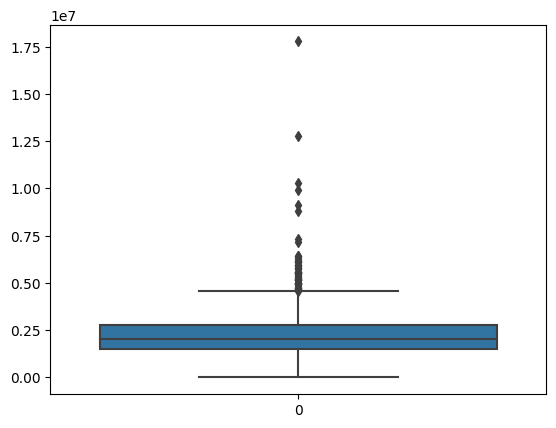

In [36]:
import seaborn as sns
sns.boxplot(rent['보증금평균'])

## 데이터 병합

In [289]:
df = pd.merge(living_popul_year, resident_popul_year)
df = pd.merge(df, area)
df = pd.merge(df, store_year)
df = pd.merge(df, working_popul_year)
df = pd.merge(df, facilitie_year)
df = pd.merge(df, estimated_sales_year)

In [229]:
# cols_1 = ['자치구_코드_명', '행정동_코드_명', '임대시세층구분명', '보증금평균', '월임대료평균']
cols_2 = ['상권_구분_코드_명', '상권_코드_명', '영역_면적', '엑스좌표_값', '와이좌표_값','자치구_코드_명','행정동_코드_명']
cols_3 = ['총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수',
          '연령대_10_유동인구_수', '연령대_20_유동인구_수', '연령대_30_유동인구_수', '연령대_40_유동인구_수', '연령대_50_유동인구_수', '연령대_60_이상_유동인구_수',
          '시간대_06_11_유동인구_수', '시간대_11_14_유동인구_수', '시간대_14_17_유동인구_수', '시간대_17_21_유동인구_수', '시간대_21_06_유동인구_수',
          '주중_유동인구_수', '주말_유동인구_수']
cols_4 = ['남성연령대_10_상주인구_수', '남성연령대_20_상주인구_수', '남성연령대_30_상주인구_수', '남성연령대_40_상주인구_수', '남성연령대_50_상주인구_수', '남성연령대_60_이상_상주인구_수', 
          '여성연령대_10_상주인구_수', '여성연령대_20_상주인구_수', '여성연령대_30_상주인구_수', '여성연령대_40_상주인구_수', '여성연령대_50_상주인구_수', '여성연령대_60_이상_상주인구_수',
          '총_직장_인구_수']
cols_5 = ['관공서_수', '은행_수', '종합병원_수', '일반_병원_수', '약국_수', '유치원_수', '초등학교_수', '중학교_수', '고등학교_수',
          '대학교_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수', '공항_수', '철도_역_수', '버스_터미널_수', '지하철_역_수', '버스_정거장_수']
cols_6 = ['서비스_업종_코드_명', '점포_수', '유사_업종_점포_수', '개업_율', '개업_점포_수', '폐업_률', '폐업_점포_수', '프랜차이즈_점포_수']
cols_7 = ['당월_매출_금액', '주중_매출_금액', '주말_매출_금액', 
          '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~06_매출_금액', 
          '남성_매출_금액', '여성_매출_금액', 
          '연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액', 
          '당월_매출_건수', '주중_매출_건수', '주말_매출_건수', 
          '시간대_06~11_매출_건수', '시간대_11~14_매출_건수', '시간대_14~17_매출_건수', '시간대_17~21_매출_건수', '시간대_21~06_매출_건수', 
          '남성_매출_건수', '여성_매출_건수', 
          '연령대_10_매출_건수', '연령대_20_매출_건수', '연령대_30_매출_건수', '연령대_40_매출_건수', '연령대_50_매출_건수', '연령대_60_이상_매출_건수', 
          '당월_건당_매출_금액', '주중_건당_매출_금액', '주말_건당_매출_금액', 
          '시간대_06~11_건당_매출_금액', '시간대_11~14_건당_매출_금액', '시간대_14~17_건당_매출_금액', '시간대_17~21_건당_매출_금액', '시간대_21~06_건당_매출_금액', 
          '남성_건당_매출_금액', '여성_건당_매출_금액', 
          '연령대_10_건당_매출_금액', '연령대_20_건당_매출_금액', '연령대_30_건당_매출_금액', '연령대_40_건당_매출_금액', '연령대_50_건당_매출_금액', '연령대_60_이상_건당_매출_금액']


cols = [*cols_2, *cols_3, *cols_4, *cols_5, *cols_6, *cols_7]

df = df[cols]

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21929 entries, 0 to 21928
Data columns (total 85 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   상권_구분_코드_명        21929 non-null  object 
 1   상권_코드_명           21929 non-null  object 
 2   총_유동인구_수          21929 non-null  float64
 3   남성_유동인구_수         21929 non-null  float64
 4   여성_유동인구_수         21929 non-null  float64
 5   연령대_10_유동인구_수     21929 non-null  float64
 6   연령대_20_유동인구_수     21929 non-null  float64
 7   시간대_06_11_유동인구_수  21929 non-null  float64
 8   시간대_11_14_유동인구_수  21929 non-null  float64
 9   시간대_14_17_유동인구_수  21929 non-null  float64
 10  시간대_17_21_유동인구_수  21929 non-null  float64
 11  시간대_21_06_유동인구_수  21929 non-null  float64
 12  주중_유동인구_수         21929 non-null  float64
 13  주말_유동인구_수         21929 non-null  float64
 14  연령대_30_40_유동인구_수  21929 non-null  float64
 15  연령대_50_60_유동인구_수  21929 non-null  float64
 16  총_상주인구_수          21929 non-null  int64 

In [231]:
df.head()

,자치구_코드_명,행정동_코드_명,상권_구분_코드_명,상권_코드_명,영역_면적,엑스좌표_값,와이좌표_값,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,남성연령대_10_상주인구_수,남성연령대_20_상주인구_수,남성연령대_30_상주인구_수,남성연령대_40_상주인구_수,남성연령대_50_상주인구_수,남성연령대_60_이상_상주인구_수,여성연령대_10_상주인구_수,여성연령대_20_상주인구_수,여성연령대_30_상주인구_수,여성연령대_40_상주인구_수,여성연령대_50_상주인구_수,여성연령대_60_이상_상주인구_수,총_직장_인구_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,초등학교_수,중학교_수,고등학교_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,철도_역_수,버스_터미널_수,지하철_역_수,버스_정거장_수,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~06_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,당월_매출_건수,주중_매출_건수,주말_매출_건수,시간대_06~11_매출_건수,시간대_11~14_매출_건수,시간대_14~17_매출_건수,시간대_17~21_매출_건수,시간대_21~06_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,당월_건당_매출_금액,주중_건당_매출_금액,주말_건당_매출_금액,시간대_06~11_건당_매출_금액,시간대_11~14_건당_매출_금액,시간대_14~17_건당_매출_금액,시간대_17~21_건당_매출_금액,시간대_21~06_건당_매출_금액,남성_건당_매출_금액,여성_건당_매출_금액,연령대_10_건당_매출_금액,연령대_20_건당_매출_금액,연령대_30_건당_매출_금액,연령대_40_건당_매출_금액,연령대_50_건당_매출_금액,연령대_60_이상_건당_매출_금액,임대시세층구분명,보증금평균,월임대료평균
0,강북구,우이동,골목상권,4.19민주묘지역 2번,60794,201112,461090,868030.000,361490.250,506539.250,128381.000,163223.250,107811.500,113781.750,121303.500,233529.500,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,73,57,62,93,95,216,62,64,72,97,95,261,96,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,한식음식점,23,24,8,2,4,1,1,1739897842.000,1033559973.000,706337869.000,34758423.750,481068145.750,310010178.000,724466602.750,189594491.750,989044375.250,651314594.250,5154289.250,116807695.250,212122359.000,294670997.500,521347174.250,490256455.000,51956.500,33236.750,18719.750,1961.250,17455.500,10006.500,18257.750,4275.500,29305.250,21307.250,335.500,5561.500,6832.000,9084.250,14829.250,13972.000,33572.889,31134.794,37937.946,17773.801,27381.008,31010.383,39874.189,44545.446,33800.232,30709.071,15353.105,21074.157,31275.325,32766.235,35019.042,35398.899,1층외,814856,35822
1,강북구,우이동,골목상권,4.19민주묘지역 2번,60794,201112,461090,868030.000,361490.250,506539.250,128381.000,163223.250,107811.500,113781.750,121303.500,233529.500,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,73,57,62,93,95,216,62,64,72,97,95,261,96,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,한식음식점,23,24,8,2,4,1,1,1739897842.000,1033559973.000,706337869.000,34758423.750,481068145.750,310010178.000,724466602.750,189594491.750,989044375.250,651314594.250,5154289.250,116807695.250,212122359.000,294670997.500,521347174.250,490256455.000,51956.500,33236.750,18719.750,1961.250,17455.500,10006.500,18257.750,4275.500,29305.250,21307.250,335.500,5561.500,6832.000,9084.250,14829.250,13972.000,33572.889,31134.794,37937.946,17773.801,27381.008,31010.383,39874.189,44545.446,33800.232,30709.071,15353.105,21074.157,31275.325,32766.235,35019.042,35398.899,1층,1600781,74305
2,강북구,우이동,골목상권,4.19민주묘지역 2번,60794,201112,461090,868030.000,361490.250,506539.250,128381.000,163223.250,107811.500,113781.750,121303.500,233529.500,169905.000,105148.000,103902.500,145960.750,343114.000,619012.250,249017.500,73,57,62,93,95,216,62,64,72,97,95,261,96,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,일식음식점,3,3,0,0,0,0,0,18435727.000,15543098.250,2892628.750,0.000,9658447.500,3074001.750,5623422.500,79855.250,7005386.750,11430340.250,561557.250,6405609.500,2608330.250,3453367.250,3140322.750,2266540.000,1519.250,1359.250,160.000,0.000,821.500,247.000,441.750,9.000,463.250,1056.000,55.250,601.250,198.500,296.750,264.000,103.500,12216.994,1151

## 데이터 모델링

In [310]:
col_num = list(df.select_dtypes(include = ['number']).columns)

In [311]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[col_num] = scaler.fit_transform(df[col_num])


In [312]:
col_cat = list(df.select_dtypes(include = ['object']).columns)

In [314]:
from sklearn.preprocessing import LabelEncoder
for i in col_cat : 
    le = LabelEncoder()
    le.fit(df[i])
    df[i] = le.transform(df[i])
print(df)

       상권_구분_코드_명  상권_코드_명  총_유동인구_수  남성_유동인구_수  여성_유동인구_수  연령대_10_유동인구_수  \
0               0        0     0.101      0.078      0.128          0.158   
1               0        0     0.101      0.078      0.128          0.158   
2               0        0     0.101      0.078      0.128          0.158   
3               0        0     0.101      0.078      0.128          0.158   
4               0        0     0.101      0.078      0.128          0.158   
...           ...      ...       ...        ...        ...            ...   
21924           3     1478     0.015      0.014      0.017          0.019   
21925           3     1478     0.015      0.014      0.017          0.019   
21926           3     1478     0.015      0.014      0.017          0.019   
21927           3     1478     0.015      0.014      0.017          0.019   
21928           3     1478     0.015      0.014      0.017          0.019   

       연령대_20_유동인구_수  시간대_06_11_유동인구_수  시간대_11_14_유동인구_수  시간대_14_17_유동인구_수 

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

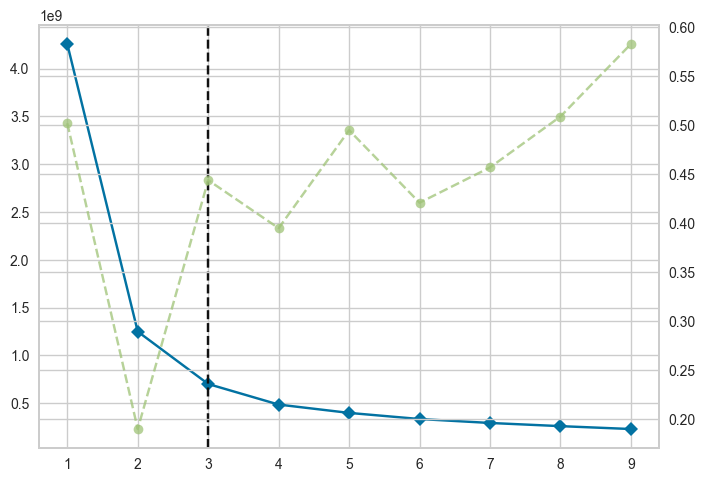

In [316]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)

In [318]:
from sklearn.cluster import KMeans
df_scale = df.copy()
k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(df_scale)

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [319]:
df['cluster']

0        1
1        1
2        1
3        1
4        1
        ..
21924    0
21925    0
21926    0
21927    0
21928    0
Name: cluster, Length: 21929, dtype: int32

In [324]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df)
pca_transformed

df['pca_x'] = pca_transformed[:, 0]  #x좌표
df['pca_y'] = pca_transformed[:, 1]  #y좌표
df

,상권_구분_코드_명,상권_코드_명,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,시간대_06_11_유동인구_수,시간대_11_14_유동인구_수,시간대_14_17_유동인구_수,시간대_17_21_유동인구_수,시간대_21_06_유동인구_수,주중_유동인구_수,주말_유동인구_수,연령대_30_40_유동인구_수,연령대_50_60_유동인구_수,총_상주인구_수,남성_상주인구_수,여성_상주인구_수,연령대_10_상주인구_수,연령대_20_상주인구_수,연령대_30_40_상주인구_수,연령대_50_60_상주인구_수,상권_구분_코드,상권_코드,엑스좌표_값,와이좌표_값,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,영역_면적,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,총_직장_인구_수,관공서_수,은행_수,종합병원_수,일반_병원_수,약국_수,유치원_수,대학교_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,공항_수,버스_터미널_수,지하철_역_수,버스_정거장_수,초중고_수,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,주중_매출_건수,주말_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,시간대_21~06_매출_금액,시간대_21~06_매출_건수,연령대_30_40_매출_금액,연령대_50_60_매출_금액,연령대_30_40_매출_건수,연령대_50_60_매출_건수,cluster,pca_x,pca_y
0,0,0,0.101,0.078,0.128,0.158,0.050,0.102,0.058,0.056,0.084,0.127,0.091,0.122,0.065,0.101,0.058,0.057,0.060,0.044,0.053,0.042,0.080,0,0.845,0.559,0.842,0.310,2,0.310,282,0.024,57,0.003,0.003,0.107,0.087,0.020,0.007,0.008,0.001,0.000,0.000,0.000,0.000,0.019,0.000,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.002,0.005,0.002,0.002,0.000,0.002,0.001,0.002,0.002,0.002,0.004,0.002,0.007,0.004,0.001,0.008,0.004,0.006,0.005,0.005,0.001,0.002,0.004,0.004,0.002,0.003,0.004,0.006,1,-710.007,169.633
1,0,0,0.101,0.078,0.128,0.158,0.050,0.102,0.058,0.056,0.084,0.127,0.091,0.122,0.065,0.101,0.058,0.057,0.060,0.044,0.053,0.042,0.080,0,0.845,0.559,0.842,0.310,2,0.310,282,0.024,40,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.019,0.000,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,-710.008,169.611
2,0,0,0.101,0.078,0.128,0.158,0.050,0.102,0.058,0.056,0.084,0.127,0.091,0.122,0.065,0.101,0.058,0.057,0.060,0.044,0.053,0.042,0.080,0,0.845,0.559,0.842,0.310,2,0.310,282,0.024,54,0.000,0.000,0.000,0.000,0.000,0.000,0.024,0.001,0.000,0.000,0.000,0.000,0.019,0.000,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.001,0.000,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.000,0.001,0.000,0.000,0.001,0.001,1,-710.007,169.629
3,0,0,0.101,0.078,0.128,0.158,0.050,0.102,0.058,0.056,0.084,0.127,0.091,0.122,0.065,0.101,0.058,0.057,0.060,0.044,0.053,0.042,0.080,0,0.845,0.559,0.842,0.310,2,0.310,282,0.024,51,0.000,0.000,0.000,0.000,0.000,0.000,0.016,0.001,0.000,0.000,0.000,0.000,0.019,0.000,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.000,0.000,0.000,1,-710.007,169.625
4,0,0,0.101,0.078,0.128,0.158,0.050,0.102,0.058,0.056,0.084,0.127,0.091,0.122,0.065,0.101,0.058,0.057,0.060,0.044,0.053,0.042,0.080,0,0.845,0.559,0.842,0.310,2,0.310,282,0.024,15,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.001,0.000,0.000,0.000,0.000,0.019,0.000,0.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.047,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.000,0.001,0.001,0.000,0.001,0.001,0.001,0.001,0.002,0.001,0.001,0.000,0.001,0.000,0.000,0.001,0.001,1,-710.011,169.579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21924,3,1478,0.015,0.014,0.017,0.019,0.005,0.014,0.009,0.010,0.016,0.016,0.013,0.019,0.013,0.015,0.037,0.038,0.036,0.023,0.039,0.025,0.053,2,0.998,0.459,

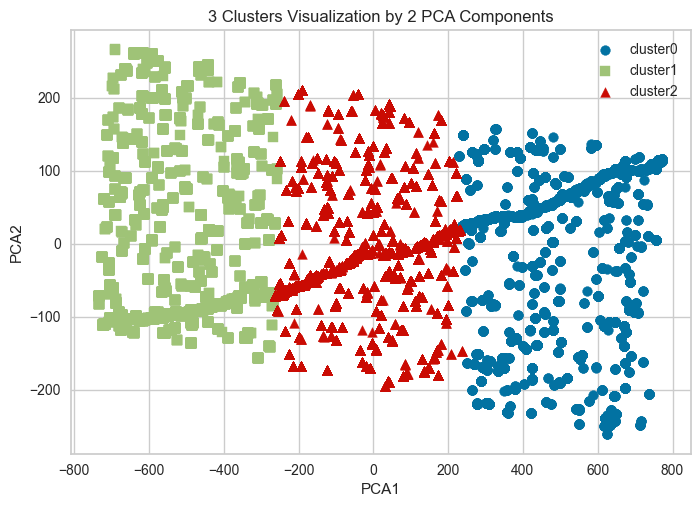

In [325]:
import matplotlib.pyplot as plt

marker0 = df[df['cluster'] == 0].index
marker1 = df[df['cluster'] == 1].index
marker2 = df[df['cluster'] == 2].index
 
 #scatter plot
plt.scatter(x = df.loc[marker0, 'pca_x'], y = df.loc[marker0, 'pca_y'], marker = 'o')
plt.scatter(x = df.loc[marker1, 'pca_x'], y = df.loc[marker1, 'pca_y'], marker = 's')
plt.scatter(x = df.loc[marker2, 'pca_x'], y = df.loc[marker2, 'pca_y'], marker = '^')
 
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.legend(['cluster0', 'cluster1', 'cluster2'])
plt.show()